In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 讀取數據
df = pd.read_csv(r"C:\Users\brigh\train.csv")
#找出含有缺失值的特徵並計算數量
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#處理Embarked缺失值 
#刪除缺失值 
#Embarked缺失值數量最少，可直接以刪除方式處理
df=df.dropna(subset=["Embarked"]) #subset參數裡面放要刪除缺失值的特徵

In [4]:
#處理Cabin缺失值 #查看Cabin的資料類型分布
df['Cabin'].unique() #可以得知類型很多(每個都不一樣) (船艙號碼)
#給定一個值"No_Cabin"代表缺失船艙號碼的乘客來進行補值
df['Cabin']=df['Cabin'].fillna("No_Cabin")

In [5]:
# #將缺失值視覺化成表格
# def Missing_Counts( Data, NoMissing=True ) : 
#     missing = Data.isnull().sum()  
    
#     if NoMissing==False :
#         missing = missing[ missing>0 ]
        
#     missing.sort_values( ascending=False, inplace=True )  
#     Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
#     Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
#     return  Missing_Count

# Missing_Counts(df)

In [6]:
#處理Age缺失值 
#年齡會受其他變數的影響，例如年紀較小的人可能會有家長陪同(Parch)，逃生時可能會優先，存活機率也相對大。
#因此我們需要比對其他變數對年齡的影響來做補值。

#利用箱形圖查看Age與Sex的關係
#sns.catplot(x="Sex", y="Age", data=df, kind="box", height=2.5, aspect=.8)
#或是
# plt.figure(figsize=(5, 6))
# sns.boxplot(x=df['Sex'], y=df['Age'])
# plt.title('Box Plot of Sex-age')
# plt.xlabel('Sex')
# plt.ylabel('Age')
#可發現不論男女在各年齡層都有族群存在，Sex不太能做為補值參考

#觀察Age缺失值在船艙等級(Pclass)的分布 #利用計數圖
#hue參數，用來為不同類別著色。df["Age"].isnull() 會生成一個布林值(TorF)，表示Age列中的每個值是否為缺失值（NaN）。
#如果Age值為缺失值，則為 True，否則為False。
# df["Age_is_null"] = df['Age'].isnull()
# sns.countplot(x=df["Pclass"], hue=df["Age_is_null"], data=df) #發現大部分的缺失狀況都是出現在3等艙中

<Axes: xlabel='Age', ylabel='Count'>

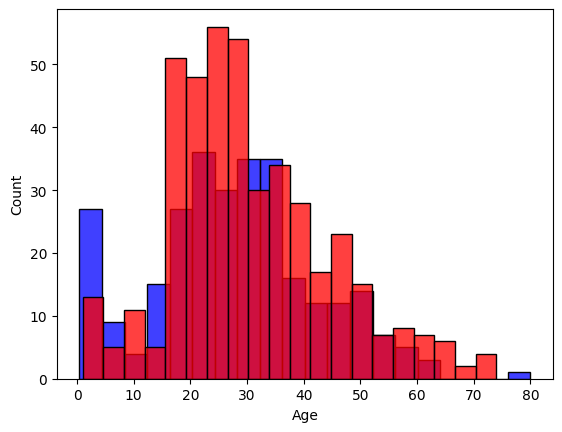

In [7]:
index_survived = (df["Age"].isnull()==False)&(df["Survived"]==1) #存活者且年齡非空白
index_died = (df["Age"].isnull()==False)&(df["Survived"]==0) #死亡者且年齡非空白

sns.histplot( df.loc[index_survived ,'Age'], bins=20, color='blue', label='Survived' ) #存活者且有年齡標示的以藍色顯示
sns.histplot( df.loc[index_died ,'Age'], bins=20, color='red', label='Survived' ) #死亡者且有年齡標示以紅色顯示

In [8]:
#外國人的稱謂和職業、年紀多少會有點關係，因此我們先處理Name這個欄位，將姓氏取出，命名為新的特徵"Title" 
#example: Braund, Mr. Owen Harris
df['Title'] = df.Name.str.split(',', expand=True)[1] #以逗號為主進行spilt，拆分後資料格式仍維持dataframe(expand)，取拆分後之後面那個部分(Mr. Owen Harris)
df['Title'] = df.Title.str.split('.', expand=True)[0] #與上行做法相同，但此次是以.作為拆分依據，取前面的部分(Mr)
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [9]:
#計算每個Title的年齡平均
Age_Mean = df[['Title','Age']].groupby( by=['Title'] ).mean()

Age_Mean.columns = ['Age_Mean'] #將計算出的平均年齡列重命名為 Age_Mean
Age_Mean.reset_index( inplace=True ) #重置索引，使 Title 成為 DataFrame 的一列，而不是索引。
#inplace=True 表示在原 DataFrame 上進行操作，而不是返回一個新的 DataFrame。

display( Age_Mean )

,Title,Age_Mean
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.662069
9,Mlle,24.000000


In [10]:
train_df=df.reset_index() #重整索引(index)
train_df["Age"].isnull()
for i in range(len(train_df["Age"].isnull())):
    if train_df["Age"].isnull()[i]==True:
        for j in range(len(Age_Mean.Title)):
            if train_df["Title"][i]==Age_Mean.Title[j]:
                train_df["Age"][i]=Age_Mean.Age_Mean[j]

In [11]:
train_df.isnull().sum()

index          0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64